In [83]:
#this project demontrates which model in Deep-Learning Is best for working with Images

In [1]:
#firstly we will see what are the needed libraries for our project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron    # Used for simple linear classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential     # Sequential lets you build a neural network layer-by-layer in Keras.

from tensorflow.keras.layers import Dense     #Dense makes the final predictions
from tensorflow.keras.layers import Conv2D     # Conv2D extracts features
from tensorflow.keras.layers import Flatten    # Flatten reshapes them

from tensorflow.keras.layers import MaxPooling2D     # MaxPooling2D reduces size
from tensorflow.keras.layers import Dropout          # Dropout prevents overfitting

from tensorflow.keras.utils import to_categorical     # converts numeric class labels into one-hot encoded format for training classification models

In [3]:
#spilitinhg the data
# Step 1: Read the MNIST training dataset
# 'mnist_train.csv' contains training images and their corresponding digit labels.
# pd.read_csv() loads the CSV file into a pandas DataFrame for easy processing.
df = pd.read_csv("mnist_train.csv")

# Step 2: Read the MNIST testing dataset
# 'mnist_test.csv' contains a separate set of images and labels.
# This test set is used only for evaluating model performance after training.
df_test = pd.read_csv("mnist_test.csv")


In [4]:
#Understanding the data

In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(60000, 785)

In [7]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [10]:
#preprocess
# Step : Separate features (pixels) from labels in the training dataset
# df.drop("label", axis=1) removes the label column and keeps only pixel values.
# .values converts the remaining DataFrame into a NumPy array for model training.
X_train = df.drop("label", axis=1).values

# Step : Extract the labels (target output) from the training dataset
# This is the column that contains the correct digit (0–9) for each image.
y_train = df["label"].values

# Step : Separate features from labels in the test dataset
# Same process as training data — keep only pixel values as input features.
X_test = df_test.drop("label", axis=1).values

# Step : Extract the labels from the test dataset
# These labels will be used to evaluate the trained model's performance.
y_test = df_test["label"].values


In [12]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
#this gives either value 0 or 255 on the matrix
# Step : Normalize the pixel values in the training data
# MNIST pixel values range from 0 to 255.
# Dividing by 255.0 scales them to the range 0–1.
# Normalization helps the neural network train faster and more accurately.
X_train = X_train.astype("float32") / 255.0

# Step : Normalize the pixel values in the test data
# We apply the same scaling to the test set to ensure consistency.
X_test = X_test.astype("float32") / 255.0


In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
#Image pixel format
# Step : Reshape the training data into image format
# The MNIST images are 28x28 pixels, but in the CSV they are flattened into 784 columns.
# reshape(-1, 28, 28) converts each row back into a 28x28 matrix (grayscale image).
# '-1' automatically calculates the number of samples based on the data size.
X_train_img = X_train.reshape(-1, 28, 28)

# Step : Reshape the test data into image format
# Apply the same transformation to the test dataset
# so it matches the expected input shape for visualization or certain models.
X_test_img = X_test.reshape(-1, 28, 28)


In [59]:
X_train_img.shape
#So the shape confirms that your training data is now correctly formatted as 60,000 grayscale images of size 28×28.

(60000, 28, 28)

In [18]:
#One-Hot-encoding for categorial classification or predicting 'labels'
# Step : Convert training labels into one-hot encoded format
# y_train contains labels like: 0, 1, 2, ..., 9
# to_categorical converts each label into a 10-dimensional one-hot vector.
# Example: label 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_cat = to_categorical(y_train, 10)

# Step : Convert test labels into one-hot encoded format
# We apply the same conversion to the test labels to match the model output shape.
y_test_cat = to_categorical(y_test, 10)


In [45]:
#now we will make different types of models and will check which model performs the best
#this will have all the models that we've learnt till now in Deep Learning

In [60]:
#our first model , most basic --> Perceptron
# Step : Build our first and most basic model → Perceptron
# We use the Sequential API to stack layers in a simple linear manner.
perceptron = Sequential([

    # Step : Flatten the input image
    # Converts each 28x28 image into a 1D vector of 784 values.
    # A Perceptron cannot take 2D image data, so flattening is required.
    Flatten(input_shape=(28, 28)),

    # Step : Output layer with 10 neurons (one for each digit class)
    # Activation = softmax to produce probabilities for digit classes 0–9.
    Dense(10, activation="softmax")
])

# Step : Compile the model
# optimizer="sgd" → Stochastic Gradient Descent updates weights
# loss="categorical_crossentropy" → used for multi-class classification with one-hot labels
# metrics=["accuracy"] → track accuracy during training
perceptron.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Step : Train the Perceptron model
# X_train_img → input images (after reshaping)
# y_train_cat → one-hot encoded labels
# epochs=5 → model will see the entire training dataset 5 times
# batch_size=32 → updates weights every 32 samples
# validation_data → checked after every epoch to monitor generalization
# verbose=1 → display training progress
history_percp = perceptron.fit(
    X_train_img,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_img, y_test_cat),
    verbose=1
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8160 - loss: 0.7774 - val_accuracy: 0.8838 - val_loss: 0.4815
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8804 - loss: 0.4566 - val_accuracy: 0.8943 - val_loss: 0.4014
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8910 - loss: 0.4033 - val_accuracy: 0.9008 - val_loss: 0.3680
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8969 - loss: 0.3767 - val_accuracy: 0.9055 - val_loss: 0.3486
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9007 - loss: 0.3599 - val_accuracy: 0.9082 - val_loss: 0.3375


In [61]:
acc_percp = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [62]:
acc_percp

0.9082000255584717

In [63]:
# Step : Building our second model → ANN (Artificial Neural Network)
# Using the Sequential API to stack multiple fully connected (Dense) layers.
ann = Sequential([

    # Step : Flatten the 28x28 image into a 1D vector of 784 values.
    # ANN cannot process 2D images directly, so flattening is required.
    Flatten(input_shape=(28, 28)),

    # Step : First hidden layer with 128 neurons
    # Activation = ReLU to introduce non-linearity and improve learning.
    Dense(128, activation="relu"),

    # Step : Second hidden layer with 64 neurons
    # Again using ReLU to capture deeper patterns in the pixel data.
    Dense(64, activation="relu"),

    # Step : Output layer with 10 neurons (one for each digit class)
    # Softmax converts outputs into class probabilities.
    Dense(10, activation="softmax")
])

# Step : Compile the ANN model
# optimizer="adam" → Adaptive optimizer that converges faster than SGD.
# loss="categorical_crossentropy" → required for multi-class classification.
# metrics=["accuracy"] → to monitor training and validation accuracy.
ann.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Step : Train the ANN model
# X_train_img → input training images (flattened automatically by the Flatten layer)
# y_train_cat → one-hot encoded labels
# epochs=5 → model will train over 5 complete passes through the dataset
# batch_size=32 → weights updated after every 32 samples
# validation_data → evaluates model performance after each epoch
# verbose=1 → training progress bar displayed
history_ann = ann.fit(
    X_train_img,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_img, y_test_cat),
    verbose=1
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9302 - loss: 0.2391 - val_accuracy: 0.9622 - val_loss: 0.1199
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9680 - loss: 0.1035 - val_accuracy: 0.9716 - val_loss: 0.0894
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9775 - loss: 0.0725 - val_accuracy: 0.9748 - val_loss: 0.0825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9823 - loss: 0.0559 - val_accuracy: 0.9747 - val_loss: 0.0780
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0418 - val_accuracy: 0.9776 - val_loss: 0.0757


In [64]:
acc_ann = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [65]:
acc_ann

0.9775999784469604

In [67]:
#CNN requires specific formatted data 
#will create our third model that is best to work with images 
X_train_cnn = X_train.reshape(-1, 28, 28,1) #(samples, height, width, channels)

X_test_cnn = X_test.reshape(-1, 28, 28, 1) #(samples, height, width, channels)


#transforms your flat 784-dimensional vectors into image tensors that CNN layers can process. 

In [69]:
# -------------------------------
# Convolutional Neural Network for MNIST
# -------------------------------

# Building the CNN model
cnn = Sequential([
    
    # First Convolution Layer
    # Extracts low-level features like edges, lines, curves
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    
    # First MaxPooling Layer
    # Reduces spatial size → reduces computation + prevents overfitting
    MaxPooling2D(pool_size=(2,2)),

    # Second Convolution Layer
    # Learns deeper, more complex features (digits shapes)
    Conv2D(64, kernel_size=(3,3), activation="relu"),

    # Second MaxPooling Layer
    MaxPooling2D(pool_size=(2,2)),

    # Flatten layer
    # Converts 2D feature maps into a 1D vector → for Dense layers
    Flatten(),

    # Dense hidden layer
    # Learns complex relationships from extracted features
    Dense(128, activation="relu"),

    # Dropout Layer
    # Turns off 50% neurons during training → avoids overfitting
    Dropout(0.5),

    # Output Layer
    # Softmax gives probability for each digit (0-9)
    Dense(10, activation="softmax")
])

# Compiling the model
# Adam → fast & efficient optimization
# categorical_crossentropy → used for multi-class classification
cnn.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Training the CNN
# Pass training images & labels, validate on test set
history_cnn = cnn.fit(
    X_train_cnn, 
    y_train_cat,
    epochs=5, 
    batch_size=32,
    validation_data=(X_test_cnn, y_test_cat),
    verbose=1
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9355 - loss: 0.2151 - val_accuracy: 0.9843 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9762 - loss: 0.0804 - val_accuracy: 0.9894 - val_loss: 0.0322
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9825 - loss: 0.0599 - val_accuracy: 0.9891 - val_loss: 0.0326
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9861 - loss: 0.0483 - val_accuracy: 0.9905 - val_loss: 0.0291
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9913 - val_loss: 0.0278


In [70]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]

In [71]:
acc_cnn

0.9912999868392944

In [47]:
# Function to visualize how model accuracy and loss change over epochs
def plot_training(history, title):

    # Create a figure with a width of 12 inches and height of 4 inches
    plt.figure(figsize=(12,4))

    # ---------------------------------------
    # Plotting Accuracy Curve (Train vs Val)
    # ---------------------------------------
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
    plt.plot(history.history['accuracy'], label="Train")        # Training accuracy
    plt.plot(history.history['val_accuracy'], label="Val")      # Validation accuracy
    plt.title(f"{title} Accuracy")                              # Title for accuracy plot
    plt.xlabel("Epochs")                                        # X-axis label
    plt.ylabel("Accuracy")                                      # Y-axis label
    plt.legend()                                                # Show legend

    # ---------------------------------------
    # Plotting Loss Curve (Train vs Val)
    # ---------------------------------------
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
    plt.plot(history.history['loss'], label="Train")            # Training loss
    plt.plot(history.history['val_loss'], label="Val")          # Validation loss
    plt.title(f"{title} Loss")                                  # Title for loss plot
    plt.xlabel("Epochs")                                        # X-axis label
    plt.ylabel("Loss")                                          # Y-axis label
    plt.legend()                                                # Show legend

    # Display the combined plots
    plt.show()


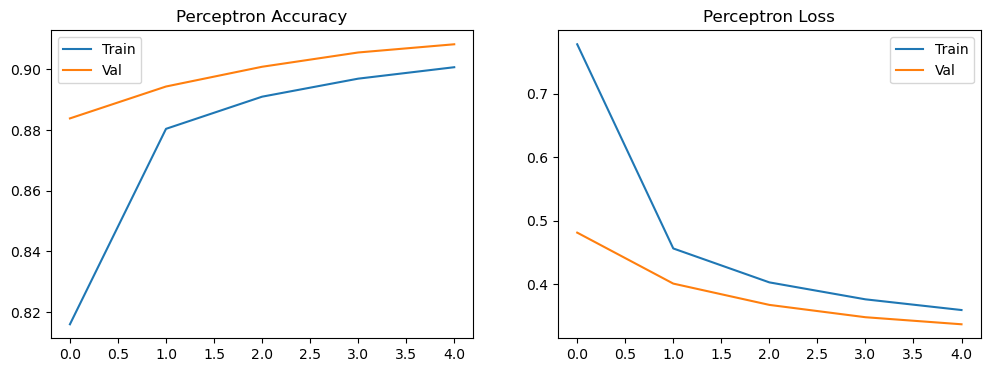

In [72]:
plot_training(history_percp, "Perceptron")

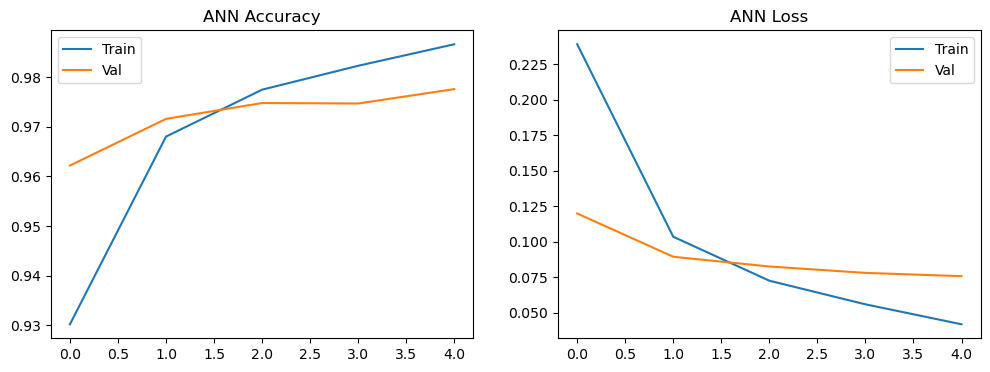

In [73]:
plot_training(history_ann, "ANN")

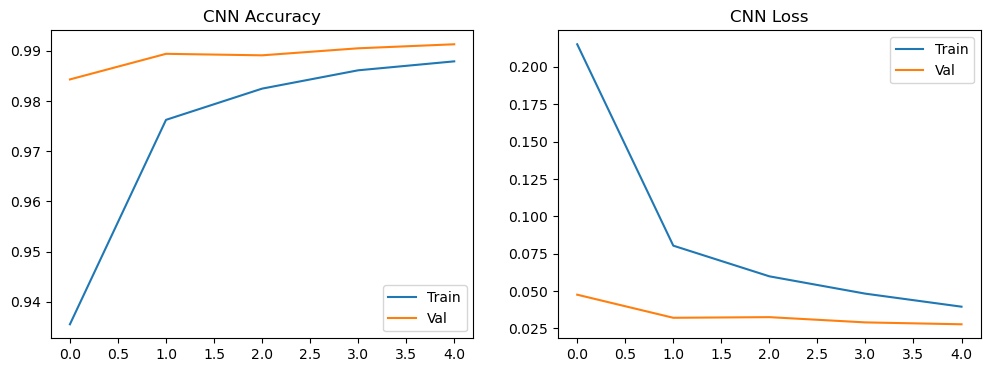

In [74]:
plot_training(history_cnn, "CNN")

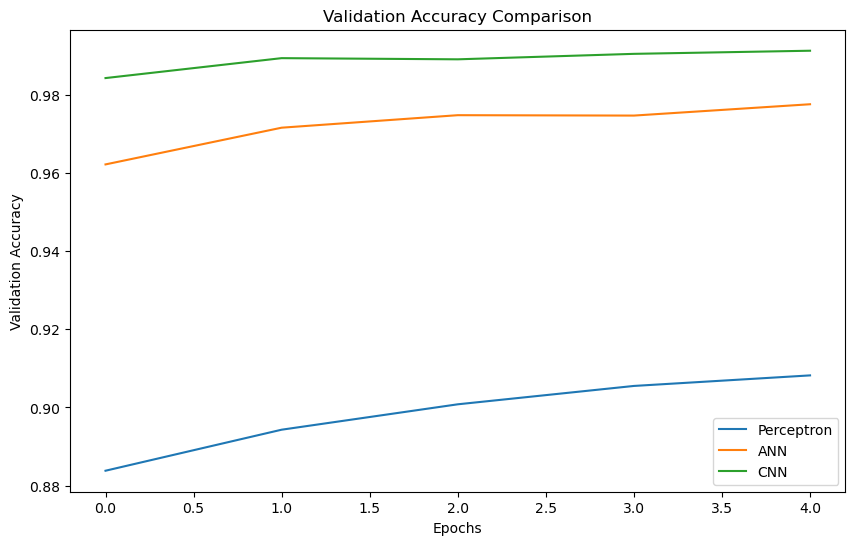

In [75]:
# Plotting validation accuracy of all three models: Perceptron, ANN, and CNN
plt.figure(figsize=(10, 6))  # Set the graph size

# Plot validation accuracy of Perceptron model
plt.plot(history_percp.history['val_accuracy'], label="Perceptron")

# Plot validation accuracy of ANN model
plt.plot(history_ann.history['val_accuracy'], label="ANN")

# Plot validation accuracy of CNN model
plt.plot(history_cnn.history['val_accuracy'], label="CNN")

# Title of the plot
plt.title("Validation Accuracy Comparison")

# Label for x-axis (epoch number)
plt.xlabel("Epochs")

# Label for y-axis (validation accuracy)
plt.ylabel("Validation Accuracy")

# Display legend to differentiate models
plt.legend()

# Show the final plotted graph
plt.show()


In [76]:
#This is AI generated function that will show us which model predicts the number as what 
# Function to display random sample images and show predictions
# from Perceptron, ANN, and CNN side by side
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):

    # Randomly select 'n' image indices to display
    idxs = np.random.choice(len(X), n, replace=False)

    # Create a large figure to hold images + predictions
    plt.figure(figsize=(15, 6))

    # Loop through each selected random sample
    for i, idx in enumerate(idxs):

        # -------------------------------------------
        # TOP ROW → Show the original image with true label
        # -------------------------------------------
        plt.subplot(2, n, i + 1)             # Position in top row
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")                       # Remove axes for clean view
        plt.title(f"True: {y_true[idx]}")     # True digit label

        # -------------------------------------------
        # Get predictions from all models for this digit
        # -------------------------------------------
        preds = []

        for model, name in zip(models, model_names):

            # CNN expects input with shape (1, 28, 28, 1)
            if name == "CNN":
                pred = model.predict(X_cnn[idx].reshape(1, 28, 28, 1))
            
            # Perceptron & ANN expect input shape (1, 28, 28)
            else:
                pred = model.predict(X[idx].reshape(1, 28, 28))

            # Convert softmax output → predicted class
            preds.append(np.argmax(pred))

        # -------------------------------------------
        # BOTTOM ROW → Show predicted outputs
        # -------------------------------------------
        plt.subplot(2, n, n + i + 1)          # Position in bottom row
        plt.axis("off")
        
        # Display model name + prediction for each model
        plt.title("\n".join(f"{name}: {p}" for name, p in zip(model_names, preds)))

    # Adjust layout so plots don't overlap
    plt.tight_layout()

    # Finally display everything
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


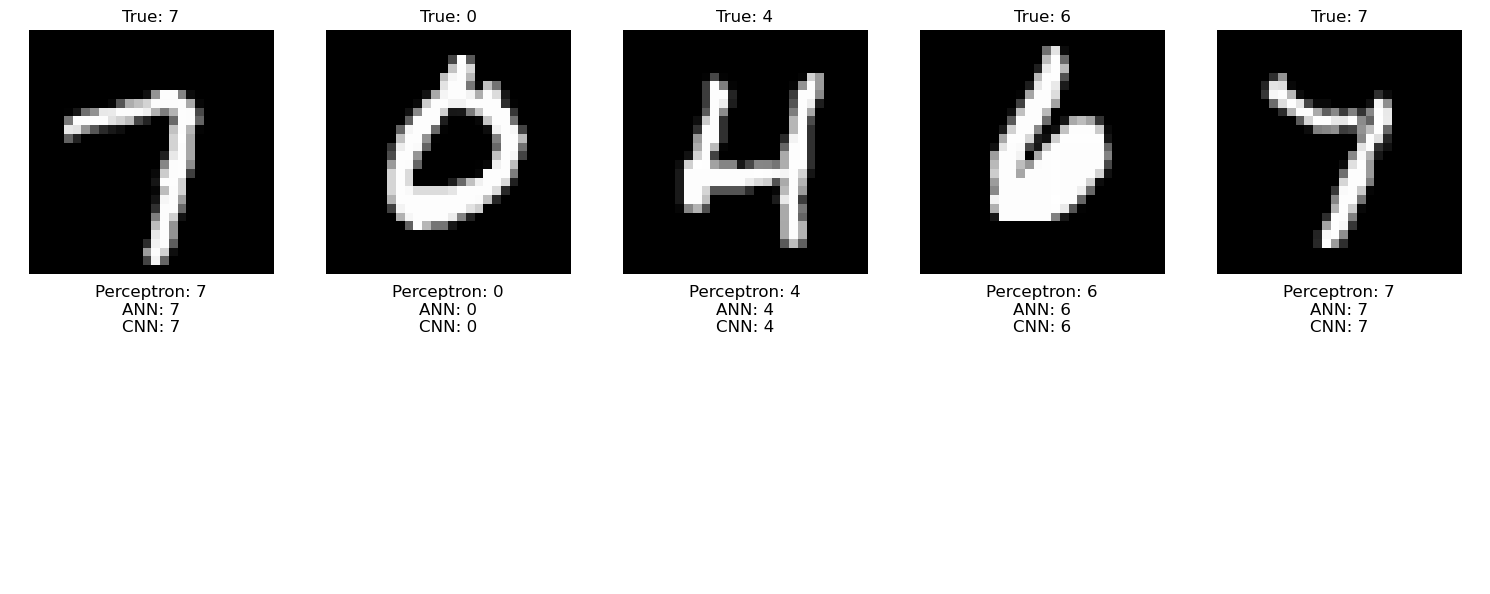

In [78]:
show_side_by_side([perceptron, ann, cnn], ["Perceptron", "ANN", "CNN"], X_test_img, X_test_cnn, y_test, 5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


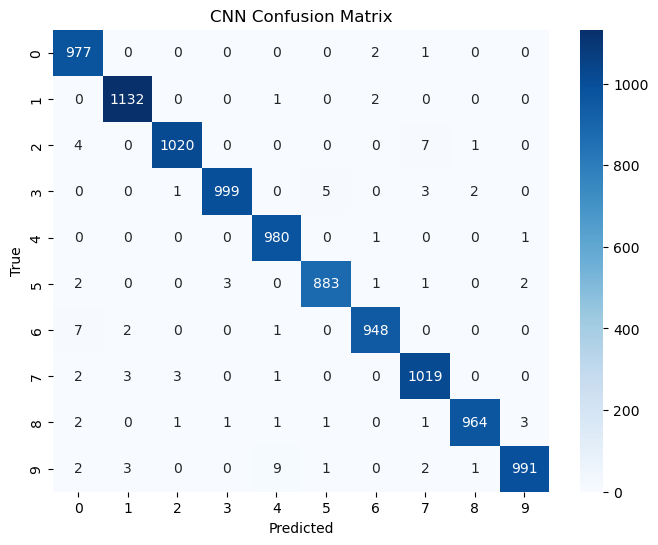

In [79]:
# -----------------------------
# Generate Predictions using CNN
# -----------------------------

# CNN outputs probabilities for each class → argmax converts them to class labels (0–9)
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)

# -----------------------------
# Compute Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred_cnn)

# -----------------------------
# Plot Confusion Matrix Heatmap
# -----------------------------
plt.figure(figsize=(8, 6))     # Set heatmap size

# Create heatmap: annot=True shows numbers inside each cell
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("CNN Confusion Matrix")   # Title of the plot
plt.xlabel("Predicted")              # X-axis label
plt.ylabel("True")                   # Y-axis label

plt.show()                           # Display the plot


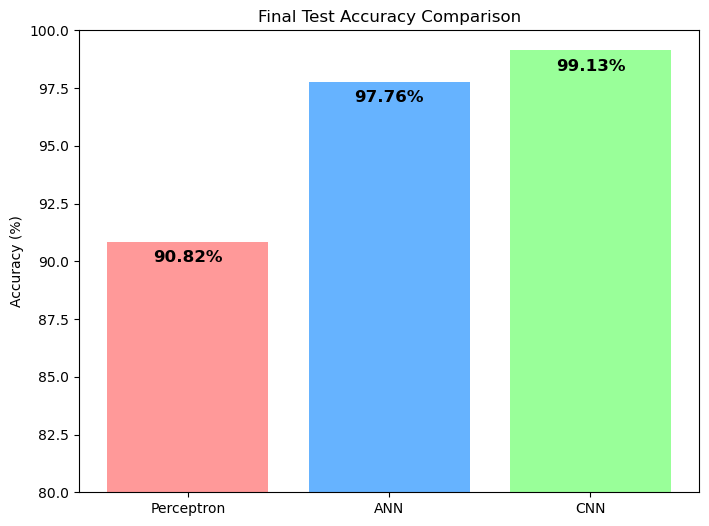

In [80]:
# Preparing the final accuracy values (converted to percentages)
final_accs = [acc_percp * 100, acc_ann * 100, acc_cnn * 100]

# Model names for labeling the bars
models = ["Perceptron", "ANN", "CNN"]

# ------------------------------------------
# Plotting the Bar Chart for Comparisons
# ------------------------------------------
plt.figure(figsize=(8, 6))   # Set figure size

# Draw the bars with different colors for each model
bars = plt.bar(models, final_accs, color=['#ff9999', '#66b3ff', '#99ff99'])

# Title of the chart
plt.title("Final Test Accuracy Comparison")

# Label for y-axis
plt.ylabel("Accuracy (%)")

# ------------------------------------------
# Adding accuracy text labels on each bar
# ------------------------------------------
for bar, acc in zip(bars, final_accs):
    # Place text at the top of each bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # X position
        bar.get_height() - 1,                # Y position slightly below bar top
        f"{acc:.2f}%",                       # Text showing accuracy
        ha='center', va='bottom',            # Horizontal/vertical alignment
        fontsize=12, fontweight='bold'
    )

# Set y-axis limit for clear visibility
plt.ylim(80, 100)

# Display the final chart
plt.show()


In [82]:
""" 
✅ Project Summary (Professional & AI-Enhanced)

MNIST Digit Classification Using Perceptron, ANN, and CNN

This project focuses on building and comparing three deep learning models—Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN)—to classify handwritten digits from the MNIST dataset. The goal was to understand how different neural architectures extract patterns from image data and how model complexity influences learning capability and accuracy.

The workflow included data preprocessing, image reshaping, model design, training, performance visualization, and result comparison. Each model was trained and evaluated on the same dataset to ensure fair benchmarking. As expected, the Perceptron captured only linear patterns, the ANN learned deeper non-linear features, and the CNN achieved the highest accuracy by leveraging spatial feature extraction using convolutional layers.

Throughout the project, AI was used as an assistive tool, mainly for generating helper functions, adding explanations, and improving code structure. However, the core intuition, model understanding, and architectural decisions were based on fundamental deep learning knowledge—such as why CNNs outperform dense models for images, how pooling reduces overfitting, and why activation functions and optimizers matter.

This project demonstrates a strong blend of conceptual understanding and practical implementation, showing not only how AI can support workflow efficiency, but also how essential it is to deeply understand the underlying mathematics and intuition behind neural networks to build effective solutions.

"""

' \n✅ Project Summary (Professional & AI-Enhanced)\n\nMNIST Digit Classification Using Perceptron, ANN, and CNN\n\nThis project focuses on building and comparing three deep learning models—Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN)—to classify handwritten digits from the MNIST dataset. The goal was to understand how different neural architectures extract patterns from image data and how model complexity influences learning capability and accuracy.\n\nThe workflow included data preprocessing, image reshaping, model design, training, performance visualization, and result comparison. Each model was trained and evaluated on the same dataset to ensure fair benchmarking. As expected, the Perceptron captured only linear patterns, the ANN learned deeper non-linear features, and the CNN achieved the highest accuracy by leveraging spatial feature extraction using convolutional layers.\n\nThroughout the project, AI was used as an assistive tool, mainly for